In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv ("/Users/frj/Desktop/pythondata/data/owid-covid-data.csv", index_col='iso_code') 
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
iso_code,,,,,,,,,,,,,,
ABW,Aruba,3/13/2020,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN
ABW,Aruba,3/20/2020,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN
ABW,Aruba,3/24/2020,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN
ABW,Aruba,3/25/2020,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN
ABW,Aruba,3/26/2020,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN


In [69]:
# Find top dates with the highest total_cases_per_million 
data = df.groupby(['date'])['total_cases_per_million'].sum().reset_index()
newdata = data.sort_values('total_cases_per_million', ascending=False)
newdata.head()

,date,total_cases_per_million
102,4/19/2020,136797.443
101,4/18/2020,133477.548
100,4/17/2020,130431.327
99,4/16/2020,126166.935
98,4/15/2020,121899.006


In [70]:
# extract data for specific date
totalCases=df[df.date == "4/19/2020"]
totalCases.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
iso_code,,,,,,,,,,,,,,
ABW,Aruba,4/19/2020,96,0,2,0,899.163,0.000,18.733,0.0,NaN,NaN,NaN,NaN
AFG,Afghanistan,4/19/2020,908,63,30,0,23.325,1.618,0.771,0.0,NaN,NaN,NaN,NaN
AGO,Angola,4/19/2020,24,5,2,0,0.730,0.152,0.061,0.0,NaN,NaN,NaN,NaN
AIA,Anguilla,4/19/2020,3,0,0,0,199.973,0.000,0.000,0.0,NaN,NaN,NaN,NaN
ALB,Albania,4/19/2020,548,9,26,0,190.423,3.127,9.035,0.0,NaN,NaN,NaN,NaN


In [71]:
# Find the range of total cases value with Numpy
cases_number = totalCases["total_cases_per_million"]

# Find the minimum time, maximum time, and range for histogram 
min_case = np.amin(cases_number) 
max_case = np.amax(cases_number) 
range_case = max_case - min_case 

# Printing the values
print("The minimum total cases per million is: " + str(min_case))
print("The maximum total cases per million is: " + str(max_case))
print("Total cases per million Range: " + str(range_case))

The minimum total cases per million is: 0.034
The maximum total cases per million is: 13406.801000000001
Total cases per million Range: 13406.767000000002


In [72]:
# Find mean and median with Numpy

mean_case = totalCases["total_cases_per_million"].mean()
median_case = totalCases["total_cases_per_million"].median()

print("The mean of total cases per million is: " + str(mean_case))
print("The median of total cases per million is: " + str(median_case))

The mean of total cases per million is: 673.8790295566507
The median of total cases per million is: 104.319


In [73]:
# Find bin size: unique country
totalCases["location"].nunique()

205

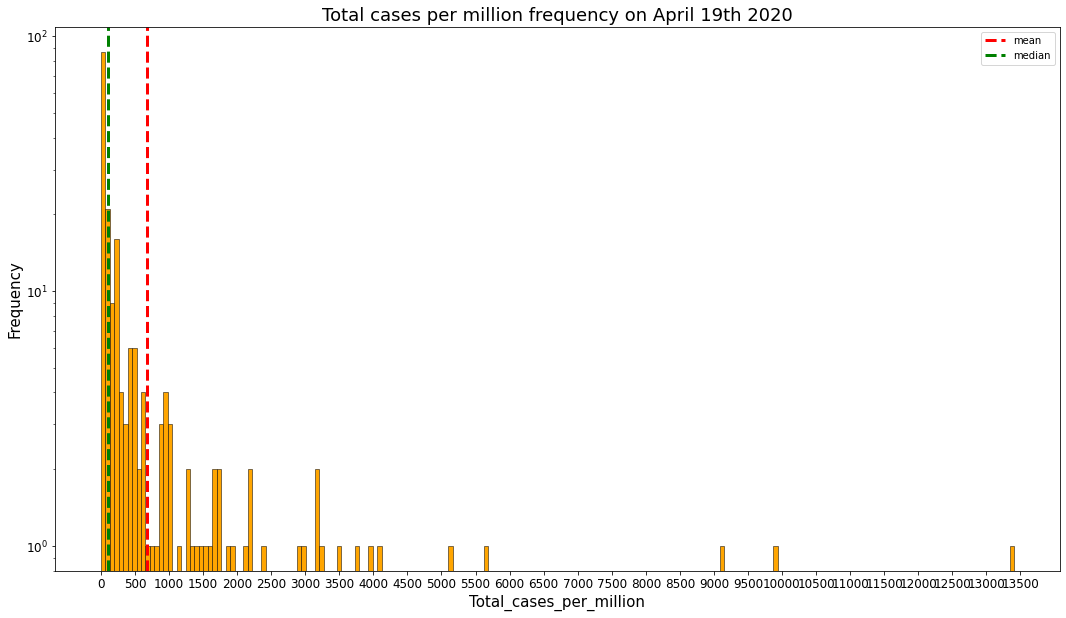

In [74]:
# Plot Histogram
# Y value is exponential, use log to extend y value, to fit the chart.

totalCases['total_cases_per_million'].hist(bins=205, grid=False, color = "orange", edgecolor='black', linewidth='0.5', 
     log = True, xlabelsize=12, ylabelsize=12, figsize=(18,10))
x_ticks = np.arange(0, 14000, 500)  # Based on the previous step: range
plt.xticks(x_ticks)
plt.xlabel("Total_cases_per_million", fontsize=15)
plt.ylabel("Frequency",fontsize=15) 
plt.title('Total cases per million frequency on April 19th 2020', fontsize=18)
  
# Draw vertical lines for mean and median
plt.axvline(totalCases['total_cases_per_million'].mean(), color='red', linestyle='dashed', linewidth=3,label='mean')  
plt.axvline(totalCases['total_cases_per_million'].median(), color='g', linestyle='dashed', linewidth=3,label='median')  

plt.legend()
plt.show()


In [ ]:
# Histogram analysis:
# This histogram displays the distribution of total cases per million of Coronavirus cases thoughout the world, on
# 04/19//2020. The average of it is 673, the mean of it is 104. The data is unimodal, with one location maximum and 
# a right skew, and the average is greater than the median.
# The range of total cases per million is 13406, with the smallest cases per million equel to 0.034 and the largest
# cases per million equel to 13406. There are some outliers that have cases per million up to 5000, 9000, 10000, 13500